# 1-D optimal transport

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Optimal transport between 1-D signals

Use the $L^2$ distance as a distance between source and target; this is a strictly convex function, so can use the north-west corner method to immediately give a unique optimal solution. Complexity only $O(n + m -1)$, where m, n are the lengths of the signals respectively.

In [2]:
def _normalise(source, target):
    return np.divide(source, np.sum(source))

In [3]:
def _optimaltransport(source, target):

    # normalise densities to have equal sum. Integers for ease.
    
    if len(source) == 0:
        mapping, cost = np.zeros((1,1)), 0.000001
        return mapping, cost
    
    source, target = np.array(source), np.array(target)
    f_x, g_y = _normalise(source, target), _normalise(target, source)
    
    if len(f_x) == 1:
        m, n = 100000000, len(g_y)
    else:        
        m, n = len(f_x), len(g_y)
       
    c, i, j = 0, 0, 0
    
    mapping = np.zeros((m, n)) # Can create heatmap to visualise mapping. Only for small m, n! Or use sparse matrix

    while i < m and j < n:
        if g_y[j] == 0: 
            j += 1
        elif f_x[i] == 0: # if supply/demand if empty, skip. 
            i += 1
        else:
            if f_x[i] - g_y[j] > 0:
                f_x[i] -= g_y[j]
                c += (i/(m-1) - j/(n-1)) ** 2 * g_y[j] # density * cost to transport
                mapping[i,j] = g_y[j]
                j += 1
            elif f_x[i] - g_y[j] < 0:
                g_y[j] -= f_x[i]
                c += (i/(m-1) - j/(n-1)) ** 2 * f_x[i] # density * cost to transport
                mapping[i,j] = f_x[i]
                i += 1
            else: 
                c += (i/(m-1) - j/(n-1)) ** 2 * f_x[i] # density * cost to transport
                mapping[i,j] = f_x[i]
                i += 1                
                j += 1
    
    return mapping, c

# Examples of optimal transport problems

Optimal transport between source and target densites $f(x)$,  $g(y)$ has a mapping $T(x)$ that satisfies the PDE 

$$\lvert\det(\nabla T(x))\rvert g(T(x)) = f(x)$$ 

that maps $f(x)$ onto $g(y)$. An optimal transport distance, known as the Wasserstein distance can be defined as $$W = \int_X \lvert x - T(x) \rvert^2 f(x)dx$$. 

From literature (see Villani) we know the mapping $T(x)$ has the form 

$$T(x) = \nabla \phi = \nabla\left(\frac{x^2}{2} - \psi\right).$$

A couple of examples.. 

Let $f(x) = 2x$ and $g(y) = 1$, where $x \in X$, $y \in Y$ and $X=Y=[0,1]$, then the PDE becomes 

$$ \nabla T(x) = \phi_{xx} = 2x.$$

Integrating.. 

$$ \nabla T(x) = \phi_{x} = x^2 = T(x).$$

Then to find the cost

$$W = \int_0^1 \lvert x - x^2 \rvert^2 2x dx  = \frac{1}{30} \approx 0.0333.$$

In [4]:
# set up densities

k = 4

m, n = 2**k, 2**k

source = 2*np.array(list(range(m))) / m 
target = np.ones(n)

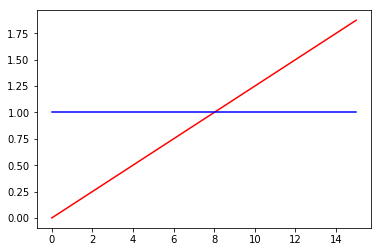

In [5]:
plt.plot(source, color = 'r')
plt.plot(target, color = 'b')

In [6]:
mapping, cost = _optimaltransport(source, target)


Transport cost: 0.0437037037037



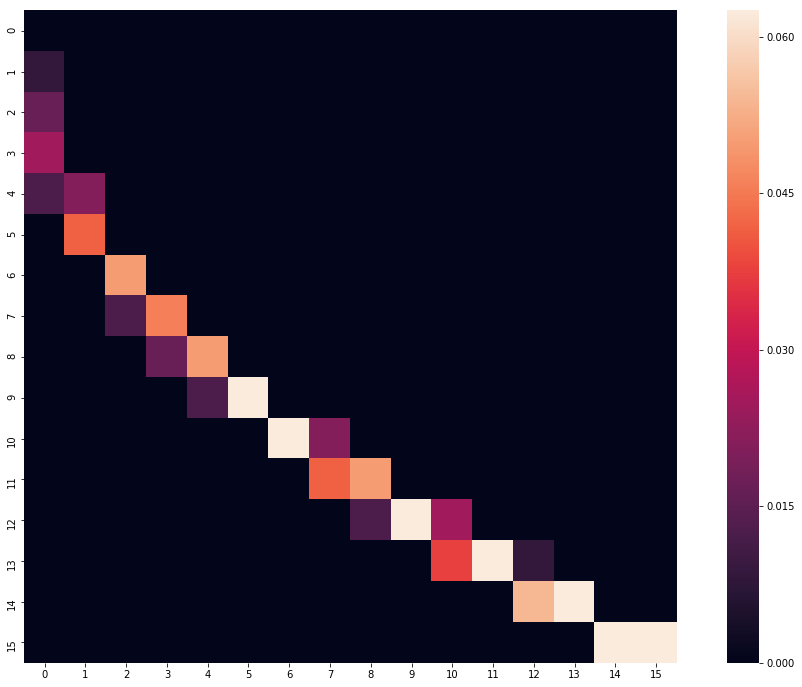

In [7]:
plt.gcf().set_size_inches(18,12)
plt.gca().set_aspect('equal')
print('\n' + 'Transport cost: ' + str(cost) + '\n')
sns.heatmap(mapping)

### We can see the cost is slightly off with a low resolution of points - this is a discretisation of a continuous problem. We expect the cost to converge and the error to be proportional to the resolution.

For example..

In [8]:
# set up densities

for i in range(1,10):

    m, n = 2**i, 2**i

    source = 2*np.array(list(range(m))) / m 
    target = np.ones(n)
    
    mapping, cost = _optimaltransport(source, target)
    
    print('Cost: ' + str(cost))
    print('Error: ' + str(1/30 - cost) + '\n')

Cost: 0.5
Error: -0.466666666667

Cost: 0.111111111111
Error: -0.0777777777778

Cost: 0.0590379008746
Error: -0.0257045675413

Cost: 0.0437037037037
Error: -0.0103703703704

Cost: 0.0379938572052
Error: -0.00466052387186

Cost: 0.0355385687491
Error: -0.00220523541574

Cost: 0.0344053089681
Error: -0.00107197563476

Cost: 0.0338617339862
Error: -0.000528400652841

Cost: 0.0335956433157
Error: -0.000262309982329




Transport cost: 0.0335956433157



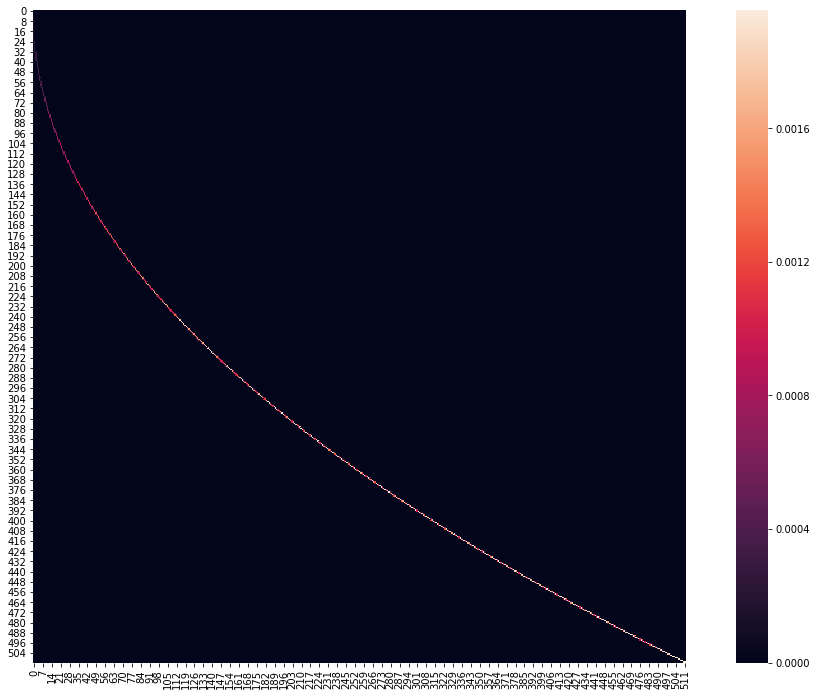

In [9]:
plt.gcf().set_size_inches(18,12)
plt.gca().set_aspect('equal')
print('\n' + 'Transport cost: ' + str(cost) + '\n')
sns.heatmap(mapping)

# Example 2

Let $f(x) = 2 - 2x$ and $g(y) = 2y$, where $x \in X$, $y \in Y$ and $X=Y=[0,1]$, then the PDE becomes 

$$ \nabla T(x)g(T(x)) = \phi_{xx}\phi_x = 2 - 2x.$$

Integrating.. 

$$ \phi_{x}^2 = 2(2x - x^2) \implies \phi_x = \sqrt{2(2x - x^2)} = T(x).$$

Then to find the cost

$$W = \int_0^1 \left\lvert x - \sqrt{2(2x - x^2)} \right\rvert^2 (2 - 2x) dx  = \frac{\pi}{4} - \frac{2}{3} \approx 0.1187.$$

In [10]:
# set up densities

k = 4

m, n = 2**k, 2**k

source = 2*np.array(list(range(m))) / m 
target = 2*np.array(list(reversed(range(n)))) / n 

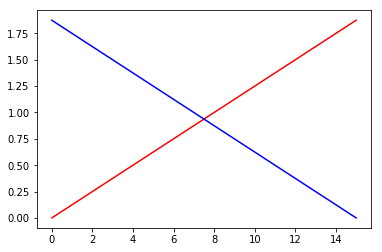

In [11]:
plt.plot(source, color='r')
plt.plot(target, color='b')

In [12]:
mapping, cost = _optimaltransport(source, target)


Transport cost: 0.152



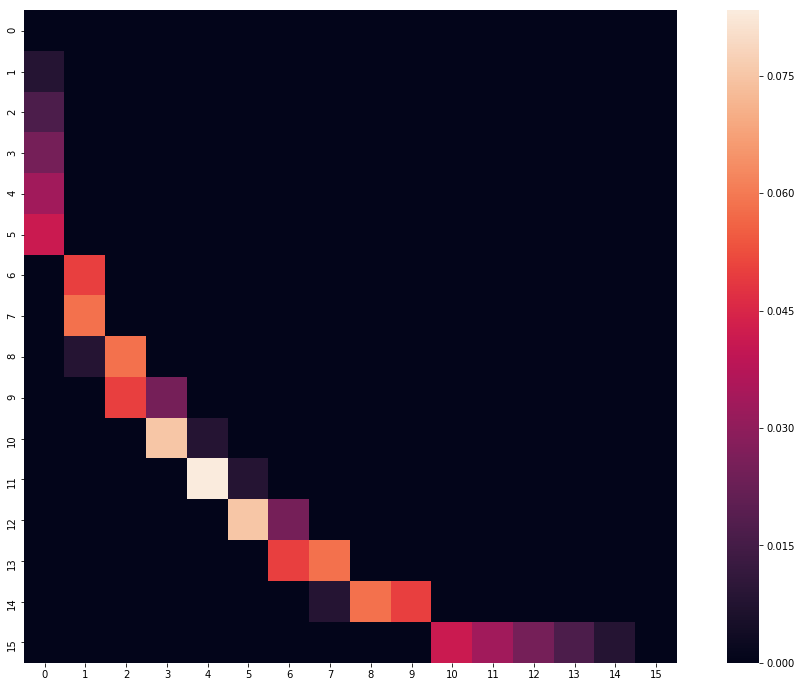

In [13]:
plt.gcf().set_size_inches(18,12)
plt.gca().set_aspect('equal')
print('\n' + 'Transport cost: ' + str(cost) + '\n')
sns.heatmap(mapping)

In [14]:
# set up densities

for i in range(1,10):

    m, n = 2**i, 2**i

    source = 2*np.array(list(range(m))) / m 
    target = 2*np.array(list(reversed(range(n)))) / n 
    
    mapping, cost = _optimaltransport(source, target)
    
    print('Cost: ' + str(cost))
    print('Error: ' + str(1/30 - cost) + '\n')

Cost: 1.0
Error: -0.966666666667

Cost: 0.333333333333
Error: -0.3

Cost: 0.198250728863
Error: -0.16491739553

Cost: 0.152
Error: -0.118666666667

Cost: 0.134100902957
Error: -0.100767569624

Cost: 0.126101792863
Error: -0.0927684595296

Cost: 0.122338479913
Error: -0.0890051465798

Cost: 0.120516211713
Error: -0.0871828783801

Cost: 0.119619137718
Error: -0.0862858043847




Transport cost: 0.119619137718



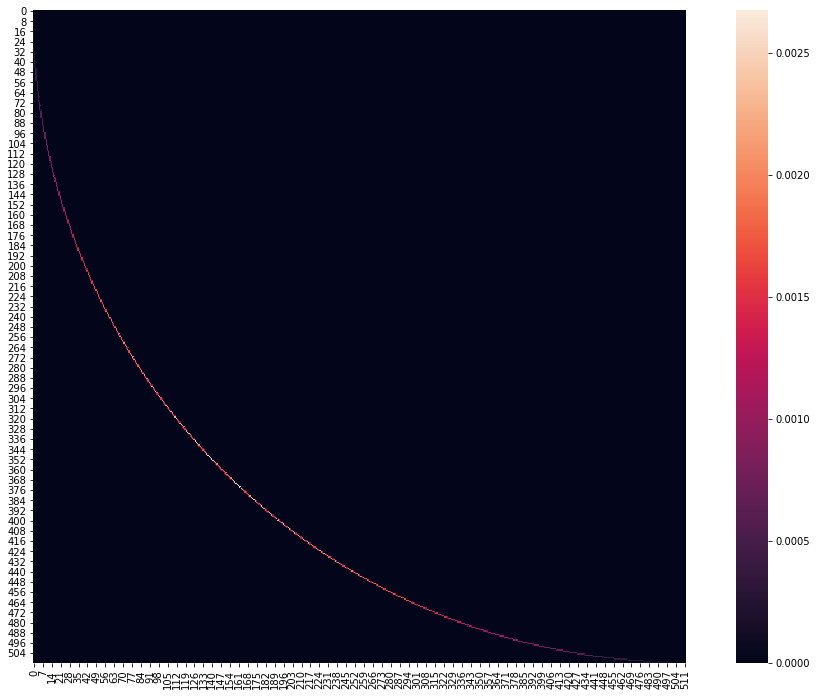

In [15]:
plt.gcf().set_size_inches(18,12)
plt.gca().set_aspect('equal')
print('\n' + 'Transport cost: ' + str(cost) + '\n')
sns.heatmap(mapping)